# A Python Quick Start Tutorial
# Lesson \#5.1 : File IO & Exception handling  - <font color=red>SOLUTION</font>

## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources (reminder)

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. **File IO**: https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
   
   1. **Exception handling**: https://docs.python.org/3/tutorial/errors.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Exercise 1: 

**Given**:
A file named **"exercise6_data.csv"** (_you may need to download that file from canvas and put it into your jupyter folder_)

The data format is defined as follows

~~~
x, y1, y2, y3
.
.
.
~~~

Each line is one data point for each of the four variables.

**Your task**:
1. open that file, 
2. read in **line by line** 
3. while reading the file, compute mean $(\mu)$ and standard deviation $(\sigma_z)$ for each variable
4. print your answers

**Formulas**:

Mean:
$$
   \mu_z = \frac{1}{N} \sum_{i} z_i
$$

where $N$ is the number of data points and $z_i$ stands for the $i^{th}$ value of any of the variables, $z$, in the file (`x,y1,y2,u3`).

Standard deviation:
$$
   \sigma_z^2 
   = \frac{\sum_{i} (z_i - \mu_z)^2}{N}
   = \frac{\sum_{i} (z_i)^2}{N} - \mu_z^2
   \quad\to\quad
   \sigma_z = \sqrt{\sigma_z^2}
$$


In [ ]:
import numpy as np

# initialize 
means = np.zeros(4)
sigs  = np.zeros(4)
N = 0

data = []

# collect data
f = open('exercise6_data.csv','r')

for line in f:
    
    vals = np.array([ float(s) for s in line.strip().split(',') ])
    
    N += 1
    means += vals         # collecting x_i
    sigs  += vals*vals    # collecting x_i^2
    
    data.append(vals)

# convert data into a multi-dimensional numpy.array
data = np.array(data)

# finish up calculations    
means /= N
sigs = np.sqrt(sigs/N - means*means)

for i in range(len(means)):
    print("data in column {:2d} -> mean={:12.8f}   stdev={:12.8f}".format(i, means[i],sigs[i]))

5. **Create a plot with three subplots (1 row, 3 columns)**. For each subplot
   - plot all the data points $y$ over $x$, one subplot per column. Use red crosses to represent the points.
   - add a blue bullet (or circle) to the plot marking the centroid of the data points (you already have the coordinates)
   - plot a box identifying the region of $\pm\sigma$ around the centroid.  Plot that rectangle as dotted cyan line without markers.
   - if you got time left: fill the box with light cyan (color code "#ccffef")

NameError: name 'means' is not defined

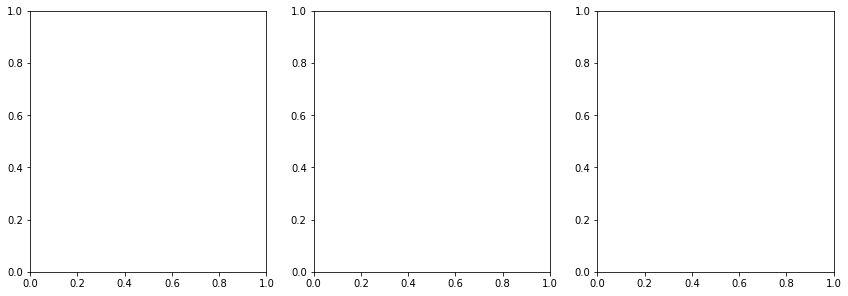

In [1]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3,figsize=plt.figaspect(1./3.))

for k in range(3):
    ax = axes[k]
    
    # the box
    x = []
    y = []
    x.append(means[0]-sigs[0])
    y.append(means[k+1]-sigs[k+1])
    x.append(means[0]+sigs[0])
    y.append(means[k+1]-sigs[k+1])
    x.append(means[0]+sigs[0])
    y.append(means[k+1]+sigs[k+1])
    x.append(means[0]-sigs[0])
    y.append(means[k+1]+sigs[k+1])
    x.append(means[0]-sigs[0])
    y.append(means[k+1]-sigs[k+1])
    ax.fill(x,y,"#ccffef")
    
    # the data points
    ax.plot(data[:,0],data[:,k+1],'r+')
    
    # the centroid
    ax.plot(means[0],means[k+1],'ob')
    
    # the line around the box
    ax.plot(x,y,':g')

**Remarks**: here is how I created that data file

In [2]:
import numpy as np

# how many data points to generate
N = 1000

# generate the data
x  = np.random.normal(10., 5., N)
y1 = np.random.lognormal(5., 2., N)
y2 = np.random.uniform(1., 7., N)
y3 = np.random.exponential(2., N)

# write the file
try:
    f=open('exercise6_data.csv','w')
except:
    print("Cannot open file 'exercise6_data.txt' for writing")
    raise
    
template = "{:16.12e},{:16.12e},{:16.12e},{:16.12e}\n"

for data in zip(x,y1,y2,y3):
    f.write(template.format(*data))

f.close()

## Homework questions

We can all learn from your questions!